In [1]:
%cd ../src/

/mnt/c/Users/Jacob/Desktop/prosjektoppgave/tcav_atari/src


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import torch

from concepts import concept_instances
from probing import train_probe
from utils import load_game_data, load_q_network_device

In [3]:
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

In [9]:
game_data = load_game_data()
q_network, device = load_q_network_device()
q_network.to('cpu')

layer = '5'
hyperparams = {
    'lr': 0.0005,
    'batch_size': 64,
    'epochs': 200,
    'lambda_l1': 0.00001,
    'patience': 5
}

: 

In [6]:
concept_cavs = {}
for concept in concept_instances.values():
    probe, score = train_probe(game_data, q_network, concept, layer, hyperparams)
    cav = probe[1].weight.squeeze(0).cpu().detach().numpy()
    concept_cavs[concept.name] = cav
    print(f"{concept.name:^40} | {score:^10.4f}")

               random (b)                |   0.0247  
             all lives (b)               |   0.9972  
             last life (b)               |   0.9931  
               reward (b)                |   0.9000  
           ball collision (b)            |   0.8025  
              ball low (b)               |   0.9589  
          ball left paddle (b)           |   0.8250  
         ball right paddle (b)           |   0.8042  
         ball same x paddle (b)          |   0.5885  
          ball distance paddle           |   0.9071  
                 ball y                  |   0.8862  
              ball y next                |   0.8933  
                 ball x                  |   0.9334  
              ball x next                |   0.9141  
                 lives                   |   0.9955  
                 x diff                  |   0.7268  
   frames until collision horizontal     |   0.4057  
    frames until collision vertical      |   0.4133  
                paddle x    

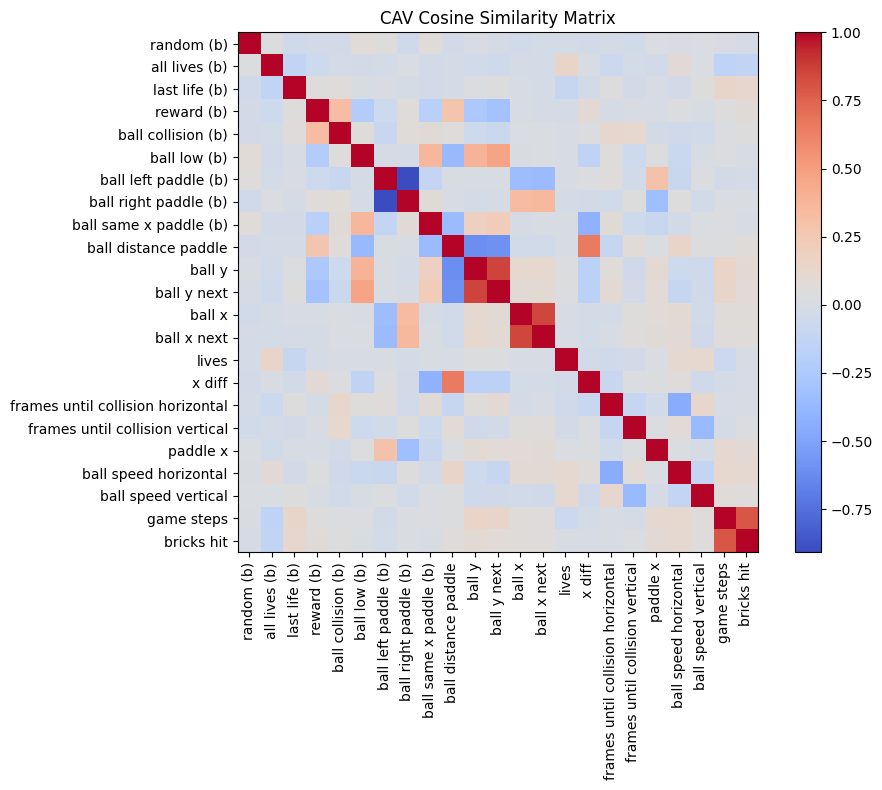

In [7]:
num_concepts = len(concept_cavs)
similarity_matrix = np.zeros((num_concepts, num_concepts))

# Populate the matrix
for i, concept1 in enumerate(concept_cavs):
    for j, concept2 in enumerate(concept_cavs):
        similarity_matrix[i, j] = cosine_similarity(concept_cavs[concept1], concept_cavs[concept2])

plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('CAV Cosine Similarity Matrix')
plt.xticks(np.arange(num_concepts), concept_cavs.keys(), rotation=90)
plt.yticks(np.arange(num_concepts), concept_cavs.keys())
plt.tight_layout()
plt.show()

In [8]:
pairs_with_scores = []
for i, concept1 in enumerate(concept_instances.keys()):
    for j, concept2 in enumerate(concept_instances.keys()):
        if i < j:  # No duplicate pairs
            similarity = cosine_similarity(concept_cavs[concept1], concept_cavs[concept2])
            pairs_with_scores.append(((concept1, concept2), similarity))

# Sort pairs based on similarity
sorted_pairs = sorted(pairs_with_scores, key=lambda x: x[1], reverse=True)

# Extract top x and bottom x correlated concept pairs
x = 10
top_x_concepts = sorted_pairs[:x]
bottom_x_concepts = sorted_pairs[-x:]

print(f"Top {x} Correlated Concepts:")
print(f"{'Concept 1':^40} | {'Concept 2':^40} | {'Score':^10}")
print('-' * 100)
for (pair, score) in top_x_concepts:
    print(f"{pair[0]:^40} | {pair[1]:^40} | {score:^10.4f} |")

print(f"\nBottom {x} Correlated Concepts:")
print(f"{'Concept 1':^40} | {'Concept 2':^40} | {'Score':^10}")
print('-' * 100)
for (pair, score) in bottom_x_concepts:
    print(f"{pair[0]:^40} | {pair[1]:^40} | {score:^10.4f} |")
    

Top 10 Correlated Concepts:
               Concept 1                 |                Concept 2                 |   Score   
----------------------------------------------------------------------------------------------------
                 ball y                  |               ball y next                |   0.8569   |
                 ball x                  |               ball x next                |   0.8508   |
               game steps                |                bricks hit                |   0.7916   |
          ball distance paddle           |                  x diff                  |   0.6535   |
              ball low (b)               |               ball y next                |   0.4656   |
              ball low (b)               |                  ball y                  |   0.3844   |
              ball low (b)               |          ball same x paddle (b)          |   0.3635   |
         ball right paddle (b)           |               ball x next             